In [1]:
library(rpart)
library(rpart.plot)
library(pROC)

# Define the directory structure using file.path()
my_dir <- file.path("C:/Users/GPEL_HPENVY/Desktop/Project_Predictive_Analytics_R")

# Check if the directory exists
if (dir.exists(my_dir)) {
  # Set the working directory
  setwd(my_dir)
  cat("Working directory set to:", getwd(), "\n")
} else {
  cat("Directory does not exist:", my_dir, "\n")
}

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



Working directory set to: C:/Users/GPEL_HPENVY/Desktop/Project_Predictive_Analytics_R 


In [2]:
# set file path
# read csv file
#setwd('H:/GPEL_HPENVY/Documents/UNSW/07_ZZBU6511/Assessment3/')
employees <- read.csv(file = 'employees2.csv')

# Modify the column names to remove unwanted characters (assuming the problematic column is named "ï..Age")
colnames(employees) <- gsub("ï\\.{2}", "", colnames(employees))

In [3]:
# Inspect file
head(employees)


Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HighPerformance
26,No,Travel_Frequently,Research & Development,10,3,3,Male,4,Laboratory Technician,...,1,1,8,3,3,7,7,7,7,0
33,No,Travel_Rarely,Research & Development,13,5,4,Male,3,Healthcare Representative,...,1,0,14,6,3,0,0,0,0,0
59,No,Travel_Rarely,Research & Development,5,3,3,Female,4,Laboratory Technician,...,1,3,12,3,2,1,0,0,0,1
42,No,Travel_Rarely,Research & Development,21,3,2,Male,4,Healthcare Representative,...,3,2,10,2,2,0,0,0,0,0
24,No,Travel_Rarely,Research & Development,27,1,4,Female,2,Manufacturing Director,...,2,2,5,6,3,4,2,3,2,0
29,No,Travel_Rarely,Research & Development,37,2,3,Male,4,Research Scientist,...,3,1,10,3,3,10,7,0,7,1


In [4]:
# Make Attrition a factor
employees$Attrition = factor(ifelse(employees$Attrition == "Yes", 1, 0))
employees$Over18 = NULL # don't use this column

In [5]:
# Split the data to training and testing
set.seed(57)
rows <- sample(nrow(employees), 0.8*nrow(employees))
training <- employees[rows, ]
testing <- employees[-rows, ]

In [8]:
# Make decision tree using all variables
tree1 <- rpart(  
  formula = Attrition ~ . - Attrition,
  data = training,
  method = "class"
)

# Predict on training and testing dataset
training$Prob1 <- predict(  
  object = tree1,  newdata = training,  type = "prob"
)

testing$Prob1 <- predict(  
  object = tree1,  newdata = testing,  type = "prob"
)

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


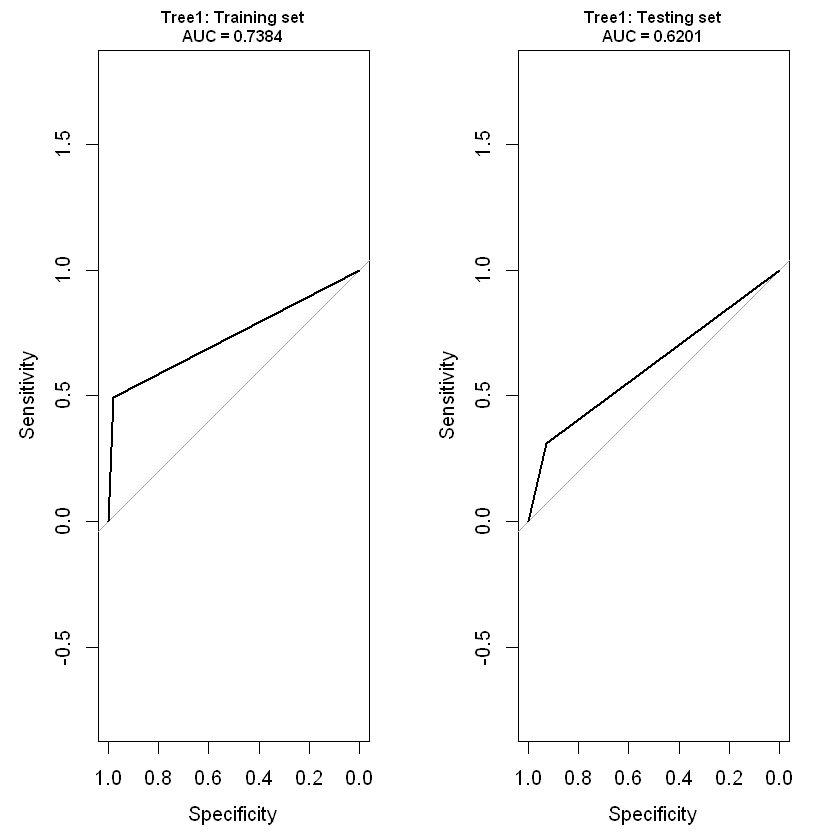

In [9]:
# Plot the ROC curves and show AUC
par(mfrow=c(1, 2), cex.main=0.8)

# Calculate ROC curve for training set
train1_roc <- roc(  
  response = training$Attrition,
  predictor = training$Prob1[, "1"]
)

# Calculate ROC curve for testing set
test1_roc <- roc(  
  response = testing$Attrition,
  predictor = testing$Prob1[, "1"]
)

# Plot ROC curves and display AUC
plot(train1_roc, main = paste("Tree1: Training set\nAUC =", round(train1_roc$auc, digits=4)))
plot(test1_roc, main = paste("Tree1: Testing set\nAUC =", round(test1_roc$auc, digits=4)))
